<a href="https://colab.research.google.com/github/nk12889/Cohort-London/blob/main/Assignment_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> Your task is to predict whether a message will be spam or not. In the class we used the <code>sklearn.countvectorizer</code> to find vectors for each message. Now you need to do the same task but rather than using countvectorizer, you are required to use TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('//content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
df['length']= df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

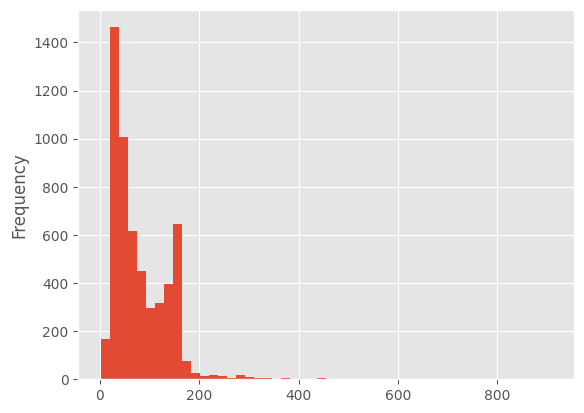

In [14]:
df['length'].plot(bins=50,kind='hist')

In [16]:
df.length.describe().T

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [18]:
df[df['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'